In [2]:
# import various packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import figure
%config InlineBackend.figure_format = 'svg'
rc = {'font.family': 'serif',
      'font.serif': 'Times New Roman',
      'font.variant': 'normal',
      'font.weight':  'normal',
      'font.stretch': 'normal',
      'font.style': 'normal',
      'font.size':    12.0,
      'mathtext.default': 'regular',
      'mathtext.fontset': 'stix'}
plt.rcParams.update(rc)

In [3]:
def e_1(d, beta, c):
    return 0.5*((d*np.sin(beta) - c)/(1 - np.sin(beta)))
def e_2(D, beta, c):
    return 0.5*(D*np.sin(beta) - c)
def S_a(z):
    return np.pi*(d + 2*z)*(l_gr - a - z)
def S_b(z):
    if z > z_1:
        return 0
    else:
        return n*(beta - fi_1(z))*(d + 2*z)*a
def fi_1(z):
    return np.arcsin((c + 2*z)/(d + 2*z))
def S_c(z):
    if z >= 0 and z <= z_1:
        return 2*n*a*b1(z)
    elif z_1 < z and z <= z_2:
        return 2*n*a*b2(z)
    elif z > z_2:
        return 0
def b1(z):
    return 0.5*(np.sqrt(D_ks**2 - (c + 2*z)**2) - np.sqrt((d + 2*z)**2 - (c + 2*z)**2))
def b2(z):
    return 0.5*(np.sqrt(D_ks**2 - (c + z*2)**2) - (c + 2*z)*np.tan(beta)**(-1))
def S_d(z):
    return np.pi/4*(D_ks**2 - (d + 2*z)**2)
def S(z):
    return S_a(z) + S_b(z) + S_c(z) + S_d(z)

In [16]:
ro_t = 1603
omega = 93.080
e_d = 0.651
D_n = 275 * 1e-3
D_ks = D_n*0.96

z_0 = e_d * D_ks / 2
d = D_ks - 2 * z_0
n = 4

beta = np.pi/n
F_ks = np.pi*(D_ks**2)/4
c_ = 0.05
d_ = d / D_ks
a_ = 0.3

epsilon_f = 1 - d_**2
f_cut = (n/np.pi) * (c_*np.sqrt(1 - c_**2) - c_*np.sqrt(d_ **
    2 - c_**2) + np.arcsin(c_) - d_**2 * np.arcsin(c_/d_))
epsilon_w = epsilon_f - a_*f_cut
F_cut = F_ks*f_cut
# длина заряда
l_gr = omega/(ro_t * epsilon_w * F_ks)

a = a_ * l_gr
c = c_ * D_ks

e1 = e_1(d, beta, c)
e2 = e_2(D_ks, beta, c)

z_1 = 0.5*(d*np.sin(beta)-c)/(1-np.sin(beta))
z_2 = (D_ks*np.sin(beta)-c)/2
print(l_gr)

1.2431454423027175


In [17]:
z = np.linspace(0, z_0, 100)
sa = np.array([S_a(zx) for zx in z ])
sb = np.array([S_b(zx) for zx in z ])
sc = np.array([S_c(zx) for zx in z ])
sd = np.array([S_d(zx) for zx in z ])
s = np.array([S(zx) for zx in z ])

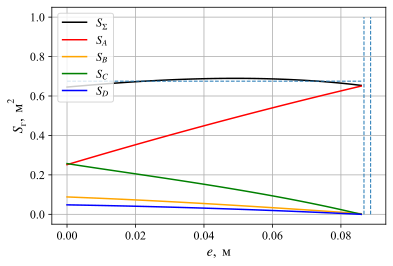

In [18]:
fig = plt.figure()
fig.patch.set_facecolor('white')
#plt.ylim([0, 0.7])
plt.plot(z, s, label='$\mathit{S}_{\mathrm{Σ}}$', color='black')
plt.plot(z, sa, label='$\mathit{S_A}$', color='r')
plt.plot(z, sb, label='$\mathit{S_B}$', color='orange')
plt.plot(z, sc, label='$\mathit{S_C}$', color='g')
plt.plot(z, sd, label='$\mathit{S_D}$', color='b')

plt.hlines(s.mean(), xmin=0, xmax=z_0, linestyle='--', linewidth=1)
# plt.hlines([s[-1], s[-1]], xmin=0, xmax=z_0, linestyle='--', linewidth=1)
plt.vlines(z_1, ymin=0, ymax=1, linestyle='--', linewidth=1)
plt.vlines(z_2, ymin=0, ymax=1, linestyle='--', linewidth=1)

plt.xlabel('$\mathit{e},$ $м$', fontsize =14)
plt.ylabel('$\mathit{S}_г,$ $м^2$', fontsize =14)
#plt.xlim(0, z_0)
#plt.ylim(0, 0.7)
plt.legend(loc='best')
plt.grid()
# plt.savefig(f'S_g(e).png', dpi =300, bbox_inches='tight')
plt.show()

In [19]:
S_g_sr = omega / ro_t / z_0
kappa_kan = (sa + sb) / (F_ks * (1 - epsilon_f))
kappa_cut = sc / (F_ks * f_cut)
print("a =", a)
print("c =", c)
print("D_ks =", D_ks)
print("d =", d)
print("e_0 =", z_0)
print("f_cut =", f_cut)
print("epsilon_f =", epsilon_f)
print("epsilon_w =", epsilon_w)
print("kappa_kan_0 =", kappa_kan[0])
print("kappa_cut_0 =", kappa_cut[0])
print("l_gr =", l_gr)
print("S_sr =", s.mean())
# print(S_g_sr)

a = 0.37294363269081526
c = 0.013200000000000002
D_ks = 0.264
d = 0.092136
e_0 = 0.08593200000000001
f_cut = 0.08298730472825235
epsilon_f = 0.8781990000000001
epsilon_w = 0.8533028085815244
kappa_kan_0 = 51.00637965196754
kappa_cut_0 = 56.64260906597655
l_gr = 1.2431454423027175
S_sr = 0.6754584507908671
